In [1]:
import numpy
import matplotlib
import scipy.special #scipy.special for the sigmoid function expit()
import os
import sys
# print(sys.version)
%matplotlib inline

In [2]:
# ------------------------------ class definition -----------------------------------------

class neuralNetwork:

    #initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate ):
        #set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #link weight matrices, wih and who (weight input-hidden and hidden-output)
        #weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        
        # random weights between 0.5 and -0.5
        #self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        #self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)
        
        #random weights sampled from normal distribution centred around 0,
        #Standard Dev is 1/√(number of incoming links)
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))


        #learning rate
        self.lr = learningrate
    
        #activation function is the sigmoid function 
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    #train the neural network
    def train(self, inputs_list, targets_list):

        #convert input & target lists to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # output of previous layer * weights is Signal. Sigmoid applied to signal is new output

        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)

        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)

        #calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        # ERROR

        #output layer error is the (target - actual)
        output_errors = targets - final_outputs

        #hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        #update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))

        #update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

        pass
    
    #query the neural network   
    def query(self, inputs_list):

        #convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        #print(inputs)

        #calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)

        #calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)

        #calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs 
    
    #show the neural network nodes and weights
    def show(self):
        print("Input Nodes:",input_nodes, "Hidden Nodes:",hidden_nodes, "OutPut NOdes:", output_nodes)
        print("weights of input-hidden")
        print(self.wih)
        print("weights of hidden-output")
        print(self.who)

In [3]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 50
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [4]:
# SHOW METHOD PRINTS NETWORK INFO
# n.show()

In [5]:
# QUERY NETWORK WITH RANDOM TEST INPUTS. Len of input list must match number of input nodes
# n.query([1, 0.5, 1.5,1, 0.5, 1.5,1, 0.5, 1.5,1.2])

In [6]:
# -------------------------------------- LOADING THE TRAINING DATA ---------------------------------------

In [7]:
# CHANGE DATA DIRECTORY
# os.getcwd()
os.chdir('/Users/patrickhedley-miller/code/ArtIntel/data/MNIST/mod_one')
os.getcwd()

# OPENS DATA FILE WITH READ METHOD TO PREVENT DATA ALTERATIONS 
data_file = open('mnist_copy_100_rows.csv', 'r')
# .READLINES METHOD READS WHOLE FILE INTO ME# number of input, hidden and output nodes

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
data_list = data_file.readlines()
data_file.close()

In [8]:
# print(data_list[0]) # targets data label and the remaining 748 pixel data
# print(data_list[0][0]) # targets the data label

In [9]:
# -------------------------------------- TRAINING THE NETWORK ---------------------------------------


# for loop iterates through each row in data_list
# targets is set to array of 0s the length of output nodes
# the correct label row_value[0] is then used to change the correct output in array to 0.99

#scale and shift the inputs
# values range from 0 - 255. Inputs need to be between 0.01 - 0.99
# therefore we divide by 255 to get inputs between 0 - 1
# we multiply by 0.99 to get inputs between 0 - 0.99
# we add 0.01 to get inputs between 0.01 - 0.99


epochs = 2
for i in range(epochs):
    for record in data_list:    
        row_values = record.split(',')
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(row_values[0])] = 0.99
        inputs = (numpy.asfarray(row_values[1:])/ 255.0 * 0.99) + 0.01
        n.train(inputs, targets)
        pass
    pass



In [10]:
# -------------------------------------- TESTING THE NETWORK ---------------------------------------

# load the mnist test data CSV file into a list
# test_data_file = open("mnist_dataset/mnist_test.csv", 'r') -- TARIQ VERSION
test_data_file = open("mnist_copy_10_rows.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [27]:
# takes random line in training data and splits by commas. Targets correct label with 0
from random import randint
random_test = randint(0, 9)
# print(test_data_list[0])
row_values = test_data_list[random_test].split(',')
print(row_values[0])

2


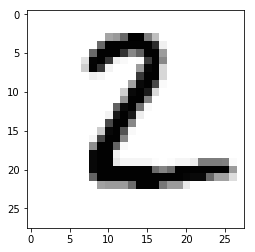

In [28]:
# checks img array of random test row
image_array = numpy.asfarray(row_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [26]:
# assigns inputs to scaled values of random_test img array
# queries network with that array
inputs = (numpy.asfarray(row_values[1:]) / 255.0 * 0.99) + 0.01
n.query(inputs)

array([[ 0.27143914],
       [ 0.0431725 ],
       [ 0.07902184],
       [ 0.14955787],
       [ 0.03307839],
       [ 0.06488643],
       [ 0.25622794],
       [ 0.16818655],
       [ 0.03411992],
       [ 0.10787263]])

In [14]:
# ---------------------------------- TESTING THE NETWORK with Performance Metrics-------------------------------

scorecard = []
for record in test_data_list:
    row_values = record.split(',')
    correct_label = int(row_values[0])
    inputs = (numpy.asfarray(row_values[1:])/ 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    network_label = numpy.argmax(outputs)
#     print('correct answer is:', correct_label)
#     print('network answer is:', network_label)
    if (network_label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
#     print(scorecard)

scorecard_array = numpy.asarray(scorecard)
# print(scorecard_array.sum())
# print(scorecard_array.size)

performance = scorecard_array.sum()/ scorecard_array.size
performance_percent = performance * 100
print ("performance =", performance_percent, "%")

performance = 90.0 %
